# UoL CM3070 Final Project
## Machine Learning and Neural Networks Template 1: Deep Learning on a Public Dataset
#### Authored by: Mason Burton
April 2022 Session

This code contained within this Jupyter notebook accompanies a final report submitted to the university.

Parts of this code has been reused and modified from CM3015 lectures and my own coursework, as well as the "Deep Learning with Python" textbook authored by François Chollet. These code snippets will be labeled and referenced as such.**bold text**

## Load and preprocess dataset

In [1]:
# imports
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# build training set
train_set = image_dataset_from_directory(
    '/content/dice/train',
    image_size=(120, 120),
    batch_size=32,
    validation_split=0.2,
    subset='training',
    label_mode='categorical',
    seed=37842
)

Found 14284 files belonging to 6 classes.
Using 11428 files for training.


In [3]:
# build validation set
validation_set = image_dataset_from_directory(
    '/content/dice/train',
    image_size=(120, 120),
    batch_size=32,
    validation_split=0.2,
    subset='validation',
    label_mode='categorical',
    seed=37842
)

Found 14284 files belonging to 6 classes.
Using 2856 files for validation.


In [4]:
# build test set
test_set =  image_dataset_from_directory(
    '/content/dice/valid',
    image_size=(120, 120),
    batch_size=32,
    label_mode='categorical',
)

Found 2102 files belonging to 6 classes.


## Helper Functions

In [5]:
# Helper function to plot training and validation accuracy and loss
# code reused and modified from lecture, and Deep Learning with Python textbook by François Chollet
def plot_val(history):
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(accuracy) + 1)
  plt.subplots(1, 2, figsize=(12,4)) # split into horizontally stacked subplots
  plt.subplot(1, 2, 1)
  plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
  plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
  plt.title('Training and Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.subplot(1, 2, 2)
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and Validation Loss')
  plt.ylabel('Loss')
  plt.legend()
  plt.tight_layout()
  plt.show()

In [6]:
# Helper functions to draw useful dataframes
# code reused and modified from my own previous coursework
def hist_df(history):
  return pd.DataFrame(history.history)

def train_mean_df(history):
  return pd.DataFrame(hist_df(history).mean(), columns=['Value']).style.set_caption('Training Mean')

def eval_df(test):
  return pd.DataFrame(test, index=['loss', 'accuracy'], columns=['Value']).style.set_caption('Testing Metrics')

## Baseline model to achieve statistical power

In [7]:
# set a default number of epochs to run all models for
default_epochs = 10

In [8]:
# build the model using Sequential API
model_baseline = keras.Sequential([
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(6, activation='softmax')
])

In [9]:
# compile model using appropriate loss function and optimizer
model_baseline.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
# train model
history_baseline = model_baseline.fit(train_set, epochs=default_epochs, validation_data=validation_set)

Epoch 1/10
358/358 [==============================] - 25s 57ms/step - loss: 2430.8130 - accuracy: 0.2068 - val_loss: 1.7620 - val_accuracy: 0.2791
Epoch 2/10
358/358 [==============================] - 16s 44ms/step - loss: 11.3173 - accuracy: 0.2843 - val_loss: 1.7260 - val_accuracy: 0.2791
Epoch 3/10
358/358 [==============================] - 16s 43ms/step - loss: 1.7213 - accuracy: 0.2843 - val_loss: 1.7174 - val_accuracy: 0.2791
Epoch 4/10
358/358 [==============================] - 16s 43ms/step - loss: 1.7171 - accuracy: 0.2843 - val_loss: 1.7161 - val_accuracy: 0.2791
Epoch 5/10
358/358 [==============================] - 17s 45ms/step - loss: 1.7164 - accuracy: 0.2843 - val_loss: 1.7158 - val_accuracy: 0.2791
Epoch 6/10
358/358 [==============================] - 16s 43ms/step - loss: 1.7163 - accuracy: 0.2843 - val_loss: 1.7157 - val_accuracy: 0.2791
Epoch 7/10
358/358 [==============================] - 16s 43ms/step - loss: 1.7163 - accuracy: 0.2843 - val_loss: 1.7157 - val_accur

In [11]:
# display training metrics
hist_df(history_baseline)

,loss,accuracy,val_loss,val_accuracy
0,2430.812988,0.206773,1.762041,0.279062
1,11.317337,0.284302,1.726027,0.279062
2,1.721292,0.284302,1.717409,0.279062
3,1.717102,0.284302,1.716057,0.279062
4,1.716408,0.284302,1.715780,0.279062
5,1.716325,0.284302,1.715672,0.279062
6,1.716296,0.284302,1.715660,0.279062
7,1.716307,0.284302,1.715619,0.279062
8,1.716318,0.284302,1.715608,0.279062
9,1.716300,0.284302,1.715702,0.279062


In [12]:
# display training mean values
train_mean_df(history_baseline)

,Value
loss,245.586667
accuracy,0.276549
val_loss,1.721557
val_accuracy,0.279062


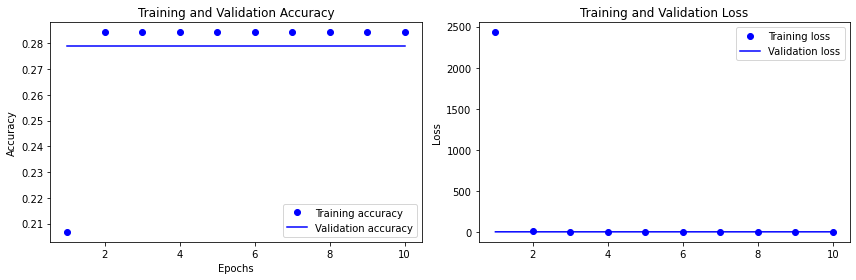

In [13]:
# plot validation loss and accuracy to determine if model overfits
plot_val(history_baseline)

In [14]:
# evaluate model against testing samples
eval_baseline = model_baseline.evaluate(test_set)

66/66 [==============================] - 2s 33ms/step - loss: 1.7049 - accuracy: 0.2878


In [15]:
# display testing metrics in dataframe
eval_df(eval_baseline)

,Value
loss,1.704889
accuracy,0.287821


## Second baseline model; increase Dense layer units (output size) to try and reduce loss

In [16]:
model_baseline2 = keras.Sequential([
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(6, activation='softmax')
])

model_baseline2.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_baseline2 = model_baseline2.fit(train_set, epochs=default_epochs, validation_data=validation_set)

Epoch 1/10
358/358 [==============================] - 18s 48ms/step - loss: 7000.3281 - accuracy: 0.2330 - val_loss: 3414.7395 - val_accuracy: 0.2864
Epoch 2/10
358/358 [==============================] - 18s 48ms/step - loss: 2009.4996 - accuracy: 0.2881 - val_loss: 1326.6552 - val_accuracy: 0.3547
Epoch 3/10
358/358 [==============================] - 18s 49ms/step - loss: 1027.1172 - accuracy: 0.3056 - val_loss: 985.1163 - val_accuracy: 0.2017
Epoch 4/10
358/358 [==============================] - 17s 48ms/step - loss: 696.0814 - accuracy: 0.3245 - val_loss: 556.7521 - val_accuracy: 0.3092
Epoch 5/10
358/358 [==============================] - 17s 48ms/step - loss: 438.4156 - accuracy: 0.3576 - val_loss: 293.9461 - val_accuracy: 0.3901
Epoch 6/10
358/358 [==============================] - 17s 48ms/step - loss: 135.8054 - accuracy: 0.3108 - val_loss: 1.7739 - val_accuracy: 0.2391
Epoch 7/10
358/358 [==============================] - 17s 48ms/step - loss: 1.7473 - accuracy: 0.2603 - val_l

In [17]:
hist_df(history_baseline2)

,loss,accuracy,val_loss,val_accuracy
0,7000.328125,0.233024,3414.739502,0.286415
1,2009.499634,0.288064,1326.655151,0.354692
2,1027.117188,0.305565,985.116272,0.201681
3,696.081360,0.324466,556.752075,0.309174
4,438.415558,0.357630,293.946136,0.390056
5,135.805389,0.310816,1.773929,0.239146
6,1.747321,0.260326,1.728327,0.279062
7,1.722543,0.284302,1.717867,0.279062
8,1.717337,0.284302,1.716110,0.279062
9,1.716487,0.284302,1.715866,0.279062


In [18]:
train_mean_df(history_baseline2)

,Value
loss,1131.415094
accuracy,0.293280
val_loss,658.586123
val_accuracy,0.289741


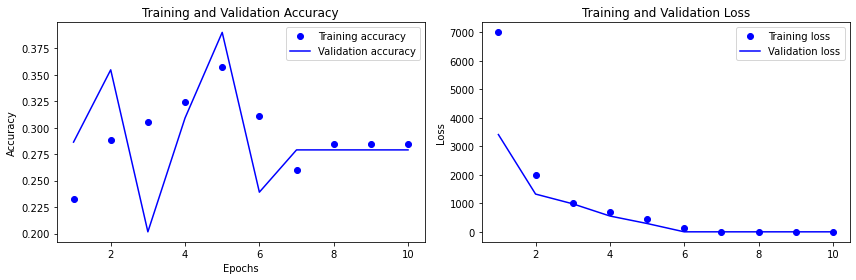

In [19]:
plot_val(history_baseline2)

In [20]:
eval_baseline2 = model_baseline2.evaluate(test_set)

66/66 [==============================] - 2s 32ms/step - loss: 2.6517 - accuracy: 0.2812


In [21]:
eval_df(eval_baseline2)

,Value
loss,2.651654
accuracy,0.281161


## Switch to CNNs; build the first Convnet

In [22]:
# switch to Functional API
cnn_input = keras.Input(shape=(120, 120, 3))
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(cnn_input)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
cnn_output = layers.Dense(6, activation='softmax')(x)
model_cnn_1 = keras.Model(inputs=cnn_input, outputs=cnn_output)

In [23]:
#show layer and parameter counts
model_cnn_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 120, 120, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 118, 118, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 59, 32)       0         
 )                                                               
                                                                 
 flatten_2 (Flatten)         (None, 111392)            0         
                                                                 
 dense_4 (Dense)             (None, 6)                 668358    
                                                                 
Total params: 669,254
Trainable params: 669,254
Non-trainable params: 0
_______________________________________________________

In [24]:
model_cnn_1.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [25]:
history_cnn_1 = model_cnn_1.fit(train_set, epochs=default_epochs, validation_data=validation_set)

Epoch 1/10
358/358 [==============================] - 19s 48ms/step - loss: 263.9401 - accuracy: 0.5998 - val_loss: 0.8574 - val_accuracy: 0.7482
Epoch 2/10
358/358 [==============================] - 17s 47ms/step - loss: 0.6404 - accuracy: 0.8400 - val_loss: 0.6275 - val_accuracy: 0.8379
Epoch 3/10
358/358 [==============================] - 17s 48ms/step - loss: 0.4835 - accuracy: 0.9150 - val_loss: 0.8295 - val_accuracy: 0.8477
Epoch 4/10
358/358 [==============================] - 17s 47ms/step - loss: 0.6667 - accuracy: 0.9320 - val_loss: 1.1319 - val_accuracy: 0.8603
Epoch 5/10
358/358 [==============================] - 17s 47ms/step - loss: 2.0263 - accuracy: 0.9415 - val_loss: 2.6070 - val_accuracy: 0.8207
Epoch 6/10
358/358 [==============================] - 17s 46ms/step - loss: 0.3490 - accuracy: 0.9653 - val_loss: 1.4653 - val_accuracy: 0.8687
Epoch 7/10
358/358 [==============================] - 17s 46ms/step - loss: 1.0696 - accuracy: 0.9586 - val_loss: 2.0862 - val_accurac

In [26]:
hist_df(history_cnn_1)

,loss,accuracy,val_loss,val_accuracy
0,263.940094,0.599755,0.857351,0.748249
1,0.640423,0.839954,0.627519,0.837885
2,0.483455,0.915033,0.829543,0.847689
3,0.666669,0.932009,1.131911,0.860294
4,2.026311,0.941547,2.607044,0.820728
5,0.349041,0.965261,1.465273,0.868697
6,1.069635,0.958610,2.086161,0.855042
7,0.519961,0.967361,1.945441,0.881653
8,0.468786,0.970774,2.882743,0.845938
9,0.916220,0.966136,6.499343,0.829482


In [27]:
train_mean_df(history_cnn_1)

,Value
loss,27.108060
accuracy,0.905644
val_loss,2.093233
val_accuracy,0.839566


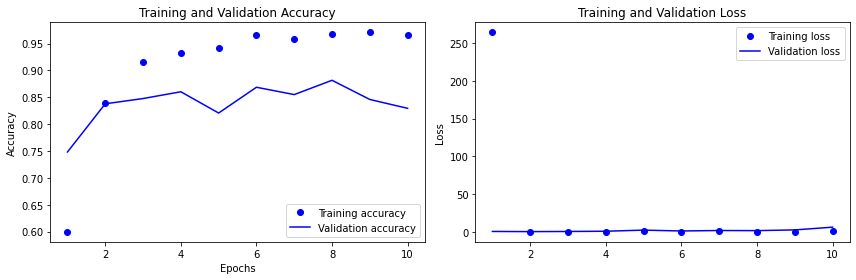

In [28]:
plot_val(history_cnn_1)

In [29]:
eval_cnn_1 = model_cnn_1.evaluate(test_set)

66/66 [==============================] - 3s 35ms/step - loss: 11.9286 - accuracy: 0.8230


In [30]:
eval_df(eval_cnn_1)

,Value
loss,11.928584
accuracy,0.823026


## Scale up CNN; add Batch Normalization and final Dense layer

In [31]:
cnn_input = keras.Input(shape=(120, 120, 3))
x = layers.Rescaling(1./255)(cnn_input)
x = layers.Conv2D(filters=16, kernel_size=3, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
cnn_output = layers.Dense(6, activation='softmax')(x)
model_cnn_2 = keras.Model(inputs=cnn_input, outputs=cnn_output)

In [32]:
model_cnn_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 120, 120, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 120, 120, 3)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 118, 118, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 118, 118, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 59, 59, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 57, 57, 32)        4640

In [33]:
model_cnn_2.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_cnn_2 = model_cnn_2.fit(train_set, epochs=default_epochs, validation_data=validation_set)

Epoch 1/10
358/358 [==============================] - 19s 51ms/step - loss: 0.7031 - accuracy: 0.7655 - val_loss: 0.8510 - val_accuracy: 0.6737
Epoch 2/10
358/358 [==============================] - 19s 53ms/step - loss: 0.1502 - accuracy: 0.9562 - val_loss: 0.1599 - val_accuracy: 0.9503
Epoch 3/10
358/358 [==============================] - 19s 51ms/step - loss: 0.1217 - accuracy: 0.9753 - val_loss: 8.3912 - val_accuracy: 0.4573
Epoch 4/10
358/358 [==============================] - 18s 51ms/step - loss: 0.0721 - accuracy: 0.9837 - val_loss: 0.5499 - val_accuracy: 0.9020
Epoch 5/10
358/358 [==============================] - 18s 50ms/step - loss: 0.0857 - accuracy: 0.9845 - val_loss: 0.0767 - val_accuracy: 0.9839
Epoch 6/10
358/358 [==============================] - 18s 51ms/step - loss: 0.0853 - accuracy: 0.9863 - val_loss: 2.9300 - val_accuracy: 0.7994
Epoch 7/10
358/358 [==============================] - 18s 51ms/step - loss: 0.0669 - accuracy: 0.9882 - val_loss: 0.1125 - val_accuracy:

In [34]:
hist_df(history_cnn_2)

,loss,accuracy,val_loss,val_accuracy
0,0.703053,0.765488,0.850955,0.673669
1,0.150229,0.956160,0.159875,0.950280
2,0.121717,0.975324,8.391210,0.457283
3,0.072077,0.983724,0.549861,0.901961
4,0.085654,0.984512,0.076696,0.983894
5,0.085289,0.986262,2.930000,0.799370
6,0.066873,0.988187,0.112492,0.984944
7,0.081902,0.989062,0.028277,0.996148
8,0.078859,0.989149,0.137870,0.982143
9,0.086874,0.990812,1.143856,0.918417


In [35]:
train_mean_df(history_cnn_2)

,Value
loss,0.153253
accuracy,0.960868
val_loss,1.438109
val_accuracy,0.864811


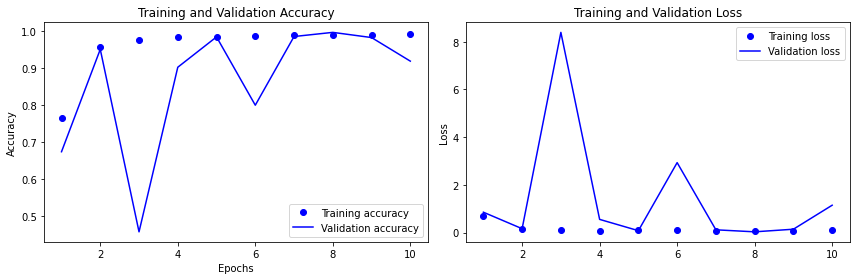

In [36]:
plot_val(history_cnn_2)

In [37]:
eval_cnn_2 = model_cnn_2.evaluate(test_set)

66/66 [==============================] - 3s 37ms/step - loss: 2.2812 - accuracy: 0.8944


In [38]:
eval_df(eval_cnn_2)

,Value
loss,2.281184
accuracy,0.894386


## Attempt to regularize model by adding dropout layers 

In [39]:
# added dropout layers
cnn_input = keras.Input(shape=(120, 120, 3))
x = layers.Rescaling(1./255)(cnn_input)
x = layers.Conv2D(filters=16, kernel_size=3, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.1)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.1)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.1)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
cnn_output = layers.Dense(6, activation='softmax')(x)
model_cnn_3 = keras.Model(inputs=cnn_input, outputs=cnn_output)

In [40]:
model_cnn_3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 120, 120, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 120, 120, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 118, 118, 16)      448       
                                                                 
 batch_normalization_1 (Batc  (None, 118, 118, 16)     64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 59, 59, 16)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 59, 59, 16)        0   

In [41]:
model_cnn_3.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_cnn_3 = model_cnn_3.fit(train_set, epochs=default_epochs, validation_data=validation_set)

Epoch 1/10
358/358 [==============================] - 19s 50ms/step - loss: 0.8720 - accuracy: 0.6984 - val_loss: 0.8190 - val_accuracy: 0.7780
Epoch 2/10
358/358 [==============================] - 18s 50ms/step - loss: 0.2290 - accuracy: 0.9278 - val_loss: 0.1705 - val_accuracy: 0.9415
Epoch 3/10
358/358 [==============================] - 18s 51ms/step - loss: 0.1744 - accuracy: 0.9568 - val_loss: 0.9337 - val_accuracy: 0.8106
Epoch 4/10
358/358 [==============================] - 18s 51ms/step - loss: 0.1404 - accuracy: 0.9660 - val_loss: 0.2157 - val_accuracy: 0.9503
Epoch 5/10
358/358 [==============================] - 18s 51ms/step - loss: 0.1240 - accuracy: 0.9723 - val_loss: 0.1075 - val_accuracy: 0.9681
Epoch 6/10
358/358 [==============================] - 18s 50ms/step - loss: 0.1307 - accuracy: 0.9729 - val_loss: 1.9110 - val_accuracy: 0.8137
Epoch 7/10
358/358 [==============================] - 18s 50ms/step - loss: 0.1180 - accuracy: 0.9775 - val_loss: 0.0985 - val_accuracy:

In [42]:
hist_df(history_cnn_3)

,loss,accuracy,val_loss,val_accuracy
0,0.872021,0.698372,0.818966,0.778011
1,0.228956,0.927809,0.170532,0.941527
2,0.174393,0.956773,0.933737,0.810574
3,0.140405,0.966048,0.215700,0.950280
4,0.123991,0.972349,0.107468,0.968137
5,0.130700,0.972874,1.911027,0.813725
6,0.118026,0.977511,0.098510,0.976541
7,0.139039,0.977774,0.231186,0.956583
8,0.112054,0.981187,0.137031,0.966737
9,0.100585,0.981799,0.277600,0.964636


In [43]:
train_mean_df(history_cnn_3)

,Value
loss,0.214017
accuracy,0.941250
val_loss,0.490176
val_accuracy,0.912675


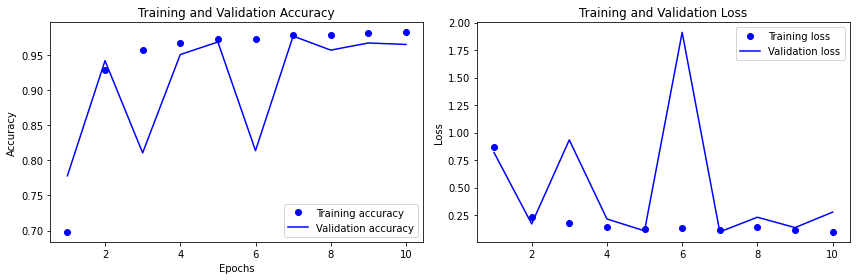

In [44]:
plot_val(history_cnn_3)

In [45]:
eval_cnn_3 = model_cnn_3.evaluate(test_set)

66/66 [==============================] - 3s 34ms/step - loss: 1.0921 - accuracy: 0.9415


In [46]:
eval_df(eval_cnn_3)

,Value
loss,1.092065
accuracy,0.941484


## Hyperparameter Tuning

In [47]:
# model building function for hyperparameter tuning
# code reused and modified from lecture, my coursework, and Deep Learning with Python textbook by François Chollet
def build_model(hp):
  # define hyperparameters to tune
  filter_size = hp.Int(name='filter_size', min_value=1, max_value=2, step=1)
  k_size = hp.Int(name='k_size', min_value=3, max_value=5, step=1)
  conv_dropout_rate = hp.Float(name='conv_dropout_rate', min_value=0.1, max_value=0.2, step=0.1)
  dense_dropout_rate = hp.Float(name='dense_dropout_rate', min_value=0.1, max_value=0.2, step=0.1)

  # build model using selected hyperparameters
  cnn_input = keras.Input(shape=(120, 120, 3))
  x = layers.Rescaling(1./255)(cnn_input)
  x = layers.Conv2D(filters=(16*filter_size), kernel_size=k_size, activation='relu')(x)
  x = layers.BatchNormalization()(x)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Dropout(conv_dropout_rate)(x)
  x = layers.Conv2D(filters=(32*filter_size), kernel_size=k_size, activation='relu')(x)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Dropout(conv_dropout_rate)(x)
  x = layers.Conv2D(filters=(64*filter_size), kernel_size=k_size, activation='relu')(x)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Dropout(conv_dropout_rate)(x)
  x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
  x = layers.Flatten()(x)
  x = layers.Dense(256, activation='relu')(x)
  x = layers.Dropout(dense_dropout_rate)(x)
  cnn_output = layers.Dense(6, activation='softmax')(x)
  model = keras.Model(inputs=cnn_input, outputs=cnn_output)

  # compile model
  model.compile(
      optimizer='rmsprop',
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )

  return model

In [48]:
# code reused and modified from lecture, my coursework, and Deep Learning with Python textbook by François Chollet
import keras_tuner as kt

tuner = kt.BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    overwrite=True
)

In [49]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
filter_size (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 2, 'step': 1, 'sampling': None}
k_size (Int)
{'default': None, 'conditions': [], 'min_value': 3, 'max_value': 5, 'step': 1, 'sampling': None}
conv_dropout_rate (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.2, 'step': 0.1, 'sampling': None}
dense_dropout_rate (Float)
{'default': 0.1, 'conditions': [], 'min_value': 0.1, 'max_value': 0.2, 'step': 0.1, 'sampling': None}


In [50]:
# EarlyStopping callback to stop training a particular hyperparameter configuration when it begins to overfit
callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)
]

In [51]:
# code reused and modified from lecture, my coursework, and Deep Learning with Python textbook by François Chollet
tuner.search(
    train_set,
    epochs=default_epochs,
    validation_data=validation_set,
    callbacks=callbacks,
    verbose=2
)

Trial 20 Complete [00h 03m 45s]
val_accuracy: 0.9887955188751221

Best val_accuracy So Far: 0.9978991746902466
Total elapsed time: 01h 02m 05s


In [52]:
best_hyperparameters = tuner.get_best_hyperparameters(1)
best_hyperparameters[0].values

{'filter_size': 1,
 'k_size': 3,
 'conv_dropout_rate': 0.2,
 'dense_dropout_rate': 0.1}

In [53]:
# get best number of epochs based on best hyperparameters
# code reused and modified from lecture, my coursework, and Deep Learning with Python textbook by François Chollet
def get_best_epoch(hp):
  model = build_model(hp)
  callbacks=[
      keras.callbacks.EarlyStopping(
          monitor='val_loss', mode='min', patience=10)
  ]
  history_best = model.fit(
      train_set,
      validation_data=validation_set,
      epochs=10,
      callbacks=callbacks)
  val_loss_per_epoch = history_best.history['val_loss']
  best_epoch = val_loss_per_epoch.index(min(val_loss_per_epoch)) + 1
  print(f"Best epoch: {best_epoch}")
  return best_epoch

In [54]:
# generate full training dataset
train_set_full = image_dataset_from_directory(
    '/content/dice/train',
    image_size=(120, 120),
    batch_size=32,
    label_mode='categorical',
    seed=37842
)

Found 14284 files belonging to 6 classes.


In [55]:
# train on the full dataset
# code reused and modified from lecture, my coursework, and Deep Learning with Python textbook by François Chollet
def get_best_trained_model(hp):
  best_epoch = get_best_epoch(hp)
  model = build_model(hp)
  model.fit(
      train_set_full,
      epochs=int(best_epoch * 1.2))
  return model

In [56]:
# determine optimal numebr of epochs, then train final model on entire training dataset
best_model = get_best_trained_model(best_hyperparameters[0])

Epoch 1/10
358/358 [==============================] - 23s 59ms/step - loss: 0.9978 - accuracy: 0.6633 - val_loss: 1.0584 - val_accuracy: 0.6513
Epoch 2/10
358/358 [==============================] - 20s 55ms/step - loss: 0.2113 - accuracy: 0.9317 - val_loss: 0.2478 - val_accuracy: 0.9289
Epoch 3/10
358/358 [==============================] - 19s 53ms/step - loss: 0.1223 - accuracy: 0.9651 - val_loss: 0.5699 - val_accuracy: 0.8613
Epoch 4/10
358/358 [==============================] - 21s 57ms/step - loss: 0.0992 - accuracy: 0.9751 - val_loss: 0.9301 - val_accuracy: 0.8561
Epoch 5/10
358/358 [==============================] - 21s 57ms/step - loss: 0.0933 - accuracy: 0.9790 - val_loss: 0.0706 - val_accuracy: 0.9804
Epoch 6/10
358/358 [==============================] - 20s 56ms/step - loss: 0.0770 - accuracy: 0.9844 - val_loss: 0.4670 - val_accuracy: 0.9118
Epoch 7/10
358/358 [==============================] - 20s 56ms/step - loss: 0.0715 - accuracy: 0.9851 - val_loss: 0.2011 - val_accuracy:

In [57]:
best_model_eval = best_model.evaluate(test_set)

66/66 [==============================] - 3s 37ms/step - loss: 1.7181 - accuracy: 0.9539


In [58]:
eval_df(best_model_eval)

,Value
loss,1.718148
accuracy,0.953853


In [60]:
best_model.save('saved_model')